<a href="https://colab.research.google.com/github/bpunar/DATA-SCIENCE-CLARUSWAY-/blob/main/Statistics_Assignment_5_(Hypothesis_Tests)_D1491_Bekir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [147]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import scipy.stats as stats
from math import sqrt

In [191]:
from matplotlib import pyplot as plt
import seaborn as sns

EXERCISE 1. The hourly wages in a particular industry are normally distributed with mean 13.20 and standard deviation 2.50. A company in this industry employs 40 workers, paying them an average of $12.20 per hour. Can this company be accused of paying substandard wages? Use an α = .01 level test. (Wackerly, Ex.10.18)

CHECK: statistic: -2.5298221281347035, pvalue= 0.005706018193000826


Research question: Can this company be accused of paying substandard wages? 

H0 : This company does not pay substandard wages. (µ >=13.20 )

H1 : This company does pay substandard wages. (µ <13.20 )

We are interested in whether the sample mean is greater than or equal to the population mean. Therefore, we need a one-tailed (lower) hypothesis test for this test.

If it is at the %1 (α = .01) significance level, the confidence level of the research will be %99.

The sample was obtained from a population with a normal distribution. The population variance is known and the sample is greater than 30. Because of these given, we will use the single sample z-test.


In [ ]:
x_bar = 12.20 # sample mean 
n = 40 # number of sample
sigma = 2.5 # sd of population
mu = 13.20 # Population mean 

z = (x_bar - mu)/(sigma/sqrt(n))
z

-2.5298221281347035

In [ ]:
stats.norm.cdf(z)

0.005706018193000826

Our p-value (0.0057) is lower than the alpha of 0.01. There is enough evidence to reject hypothesis H0. 

H0: This company does pay substandard wages. 

(µ >=13.20 is not true for this compmany)

This company can be accused of paying substandard wages.


EXERCISE 2. Shear strength measurements derived from unconfined compression tests for two types of soils gave the results shown in the following document (measurements in tons per square foot). Do the soils appear to differ with respect to average shear strength, at the 1% significance level?


CHECK: statistic: 5.1681473319343345, pvalue= 2.593228732352821e-06

In [ ]:
soil1 = pd.DataFrame([1.442, 1.943, 1.11,1.912,1.553,1.641,1.499,1.347,1.685,1.578,1.866,1.653,1.665,1.64,1.976,1.754,1.589,1.976,1.863,1.932,1.57,1.613,2.054,1.55,1.714,1.896,1.737,1.74,1.708,1.548])

In [ ]:
soil2=pd.DataFrame([1.364, 1.878,1.337,1.828,1.371,1.428,1.119,1.373,1.589,1.714,1.26,1.492,1.395,1.778,1.611,1.202,1.542,1.094,1.557,1.053,1.183,1.367,1.144,1.151,1.561,1.192,1.489,1.379,1.501,1.277,1.593,1.172,1.51,1.74,1.355])

Research question: Do the soils appear to differ with respect to average shear strength, at the 1% significance level?

H0 : The soils appear no differ with respect to average shear strength.

H1 : The soils appear differ with respect to average shear strength.

If it is at the %1 (α = .01) significance level, the confidence level of the research will be %99.

The sample was obtained from a population with unknown distribution. The population variance is unknown. Because of these given, we will use the Independent Samples T Test.

In [ ]:
print("week1 mean value:",np.mean(soil1))
print("week2 mean value:",np.mean(soil2))
print("soil1 std value:",np.std(soil1))
print("soil2 std value:",np.std(soil2))


week1 mean value: 0    1.6918
dtype: float64
week2 mean value: 0    1.417114
dtype: float64
soil1 std value: 0    0.203425
dtype: float64
soil2 std value: 0    0.21603
dtype: float64


In [ ]:
indTest = stats.ttest_ind(soil1, soil2, equal_var=True)
indTest.statistic, indTest.pvalue

(array([5.16814733]), array([2.59322873e-06]))

In [ ]:
# Decision
alpha = 0.01

if indTest.pvalue < alpha:
    print("Reject the null")
else:
    print("Fail to reject the null")

Reject the null


EXERCISE 3. The following dataset is based on data provided by the World Bank (https://datacatalog.worldbank.org/dataset/education-statistics). World Bank Edstats.

1. Get descriptive statistics (the central tendency, dispersion and shape of a dataset’s distribution) for each continent group (AS, EU, AF, NA, SA, OC).
2. Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots.

CHECK: statistic=0.870055317967983, pvalue=0.38826888111307345

In [148]:
df0 = pd.read_csv("2015 PISA Test - Sheet1.csv")
df = df0.copy()

In [149]:
df.sample(5)

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
66,TUR,EU,53.744979,420.4540,428.3351,425.4895
54,POL,EU,67.997000,504.4693,505.6971,501.4353
65,TUN,AF,48.519836,366.8180,361.0555,386.4034
34,ITA,EU,58.141735,489.7287,484.7580,480.5468
10,CHL,SA,64.289000,422.6714,458.5709,446.9561


In [150]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country Code            70 non-null     object 
 1   Continent_Code          65 non-null     object 
 2   internet_users_per_100  70 non-null     float64
 3   Math                    70 non-null     float64
 4   Reading                 70 non-null     float64
 5   Science                 70 non-null     float64
dtypes: float64(4), object(2)
memory usage: 3.4+ KB


1. Get descriptive statistics (the central tendency, dispersion and shape of a dataset’s distribution) for each continent group (AS, EU, AF, NA, SA, OC).

In [190]:
df0.groupby("Continent_Code").describe().T

Continent_Code                        AF          AS  ...          OC          SA
internet_users_per_100 count    2.000000   17.000000  ...    2.000000    7.000000
                       mean    43.359918   68.455613  ...   86.391704   60.180494
                       std      7.297226   21.086060  ...    2.589686    9.772455
                       min     38.200000   21.976068  ...   84.560519   40.900000
                       25%     40.779959   50.300000  ...   85.476112   57.116462
                       50%     43.359918   74.000000  ...   86.391704   64.289000
                       75%     45.939877   84.948353  ...   87.307296   66.321532
                       max     48.519836   92.884826  ...   88.222889   69.198471
Math                   count    2.000000   17.000000  ...    2.000000    7.000000
                       mean   363.212100  466.216647  ...  494.559750  402.887700
                       std      5.099513   64.356490  ...    0.938401   18.128894
                       min    359.606200  380.259000  ...  493.896200  377.069500
                       25%    361.409150  403.833200  ...  494.227975  388.102200
                       50%    363.212100  459.816000  ...  494.559750  409.033300
                       75%    365.015050  531.296100  ...  494.891525  417.617650
                       max    366.818000  564.189700  ...  495.223300  422.671400
Reading                count    2.000000   17.000000  ...    2.000000    7.000000
                       mean   355.457400  454.059682  ...  506.085650  425.359229
                       std      7.916909   57.048962  ...    4.504341   19.709688
                       min    349.859300  346.549000  ...  502.900600  397.541400
                       25%    352.658350  408.102200  ...  504.493125  416.126900
                       50%    355.457400  433.542300  ...  506.085650  425.303100
                       75%    358.256450  508.690500  ...  507.678175  431.922700
                       max    361.055500  535.100200  ...  509.270700  458.570900
Science                count    2.000000   17.000000  ...    2.000000    7.000000
                       mean   381.074250  467.945847  ...  511.648700  421.747186
                       std      7.536556   56.671371  ...    2.340241   18.470319
                       min    375.745100  386.485400  ...  509.993900  396.683600
                       25%    378.409675  417.611200  ...  510.821300  408.205450
                       50%    381.074250  456.483600  ...  511.648700  424.590500
                       75%    383.738825  523.277400  ...  512.476100  433.794600
                       max    386.403400  555.574700  ...  513.303500  446.956100

[32 rows x 5 columns]

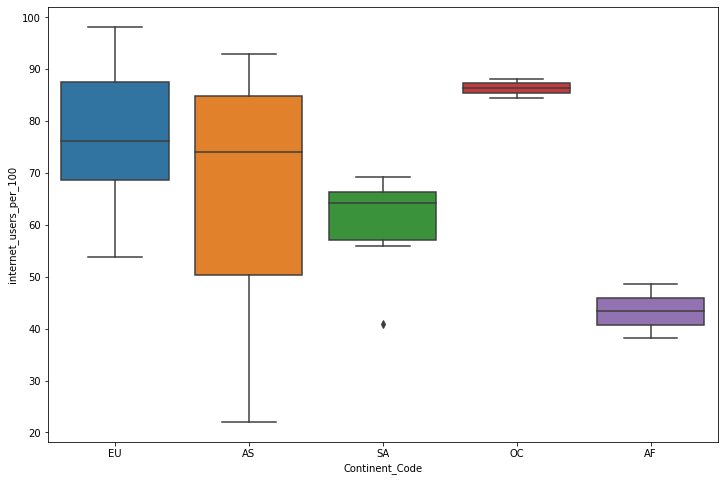

In [222]:
plt.figure(figsize = (12,8))
sns.boxplot(data=df0, x="Continent_Code", y="internet_users_per_100");


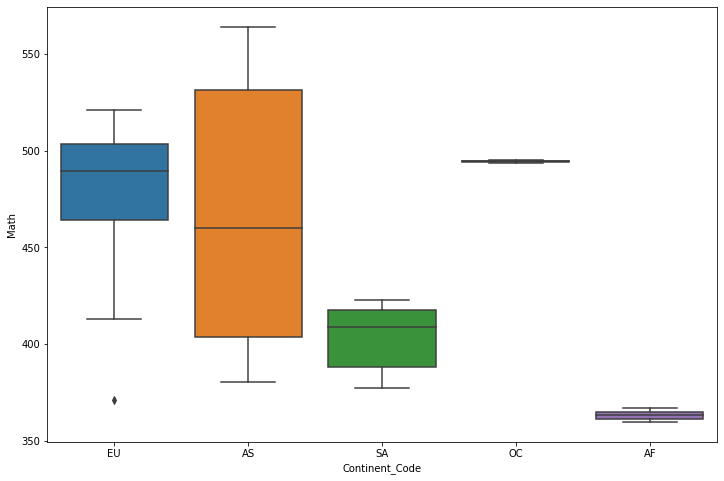

In [224]:
plt.figure(figsize = (12,8))
sns.boxplot(data=df0, x="Continent_Code", y="Math");

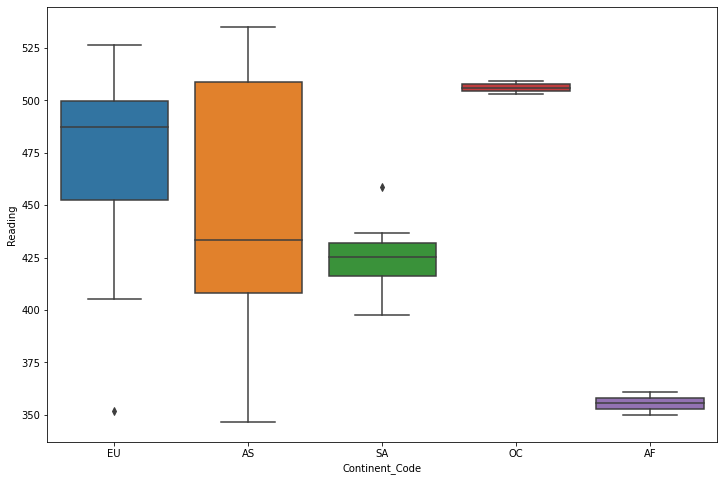

In [225]:
plt.figure(figsize = (12,8))
sns.boxplot(data=df0, x="Continent_Code", y="Reading");

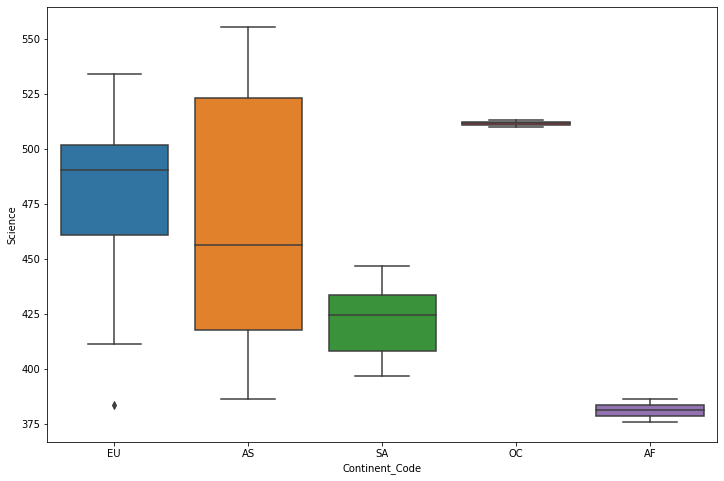

In [226]:
plt.figure(figsize = (12,8))
sns.boxplot(data=df0, x="Continent_Code", y="Science");
plt.show()

2. Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots.

In [156]:
df = df0.loc[:,["Continent_Code","Math"]]

In [154]:
df2=pd.DataFrame(df[(df["Continent_Code"]=="EU")|(df["Continent_Code"]=="AS")])
df2.Continent_Code.value_counts()

EU    37
AS    17
Name: Continent_Code, dtype: int64

In [161]:
df3=pd.DataFrame(df[(df["Continent_Code"]=="EU")])
df4=pd.DataFrame(df[(df["Continent_Code"]=="AS")])
df4

,Continent_Code,Math
1,AS,427.4827
11,AS,531.2961
25,AS,403.8332
27,AS,547.9310
30,AS,386.1096
33,AS,469.6695
35,AS,380.2590
36,AS,532.4399
37,AS,459.8160
38,AS,524.1062


We can use The Two-Sample t-Test.Because our data values are independent, are randomly sampled from two normal populations and the two independent groups have equal variances.

 H0: mu1 = mu2
 
 H1: mu1 != mu2

In [165]:
# Calculate test statistics using stats.ttest_ind()
indTest = stats.ttest_ind(df3.Math, df4.Math, equal_var=True)
indTest.statistic

0.870055317967983

In [166]:
indTest.pvalue

0.38826888111307345

In [167]:
# Decision
alpha = 0.05

if indTest.pvalue < alpha:
    print("Reject the null")
else:
    print("Fail to reject the null")

Fail to reject the null


There is no difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances).

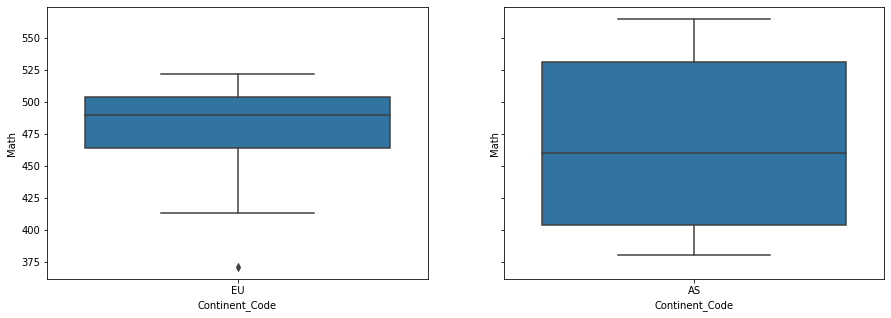

In [186]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
sns.boxplot(ax=axes[0], x="Continent_Code", y="Math", data=df3)  # RUN PLOT  
sns.boxplot(ax=axes[1], x="Continent_Code", y="Math", data=df4);  # RUN PLOT   


EXERCISE 4.The sample dataset has placement test scores (out of 100 points) for four subject areas: English, Reading, Math, and Writing. Students in the sample completed all 4 placement tests when they enrolled in the university. Suppose we are particularly interested in the English and Math sections, and want to determine whether students tended to score higher on their English or Math test, on average. We could use a paired t test to test if there was a significant difference in the average of the two tests.

Sample Dataset 2014

CHECK: statistic=36.312568981719856, pvalue=3.0710987192210606e-128

In [ ]:
df0 = pd.read_csv("students_2014 - students_2014.csv")
df = df0.copy()

In [ ]:
df.sample()

,ids,bday,enrolldate,expgradate,Rank,Major,Gender,Athlete,Height,Weight,Smoking,Sprint,MileMinDur,English,Reading,Math,Writing,State,LiveOnCampus,HowCommute,CommuteTime,SleepTime,StudyTime
55,38775,5/21/1995,4-Aug-2014,13-May-2019,1.0,Finance,0.0,1,70.58,152.7,0.0,NaN,0:06:01,79.64,68.83,47.62,77.11,In state,1.0,NaN,NaN,5.0,5.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ids           435 non-null    int64  
 1   bday          427 non-null    object 
 2   enrolldate    406 non-null    object 
 3   expgradate    406 non-null    object 
 4   Rank          406 non-null    float64
 5   Major         276 non-null    object 
 6   Gender        426 non-null    float64
 7   Athlete       435 non-null    int64  
 8   Height        408 non-null    float64
 9   Weight        376 non-null    float64
 10  Smoking       411 non-null    float64
 11  Sprint        374 non-null    float64
 12  MileMinDur    392 non-null    object 
 13  English       409 non-null    float64
 14  Reading       425 non-null    float64
 15  Math          422 non-null    float64
 16  Writing       404 non-null    float64
 17  State         408 non-null    object 
 18  LiveOnCampus  414 non-null    

In [ ]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ids,435.0,NaN,NaN,NaN,35279.022989,8637.733605,20183.0,28001.0,35350.0,42655.5,49947.0
bday,427,398,10/22/1991,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
enrolldate,406,4,4-Aug-2014,147,NaN,NaN,NaN,NaN,NaN,NaN,NaN
expgradate,406,5,13-May-2019,117,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rank,406.0,NaN,NaN,NaN,2.199507,1.098641,1.0,1.0,2.0,3.0,4.0
Major,276,247,nursing,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,426.0,NaN,NaN,NaN,0.521127,0.500141,0.0,0.0,1.0,1.0,1.0
Athlete,435.0,NaN,NaN,NaN,0.422989,0.494602,0.0,0.0,0.0,1.0,1.0
Height,408.0,NaN,NaN,NaN,68.031765,5.325655,55.0,64.8275,67.57,71.575,84.41
Weight,376.0,NaN,NaN,NaN,181.031569,42.74968,101.71,153.86,172.96,204.3075,350.07


In [ ]:
df = df0.loc[:,["English","Math"]]
df

,English,Math
0,88.24,60.02
1,89.45,70.19
2,96.73,71.20
3,74.06,55.89
4,82.61,65.52
...,...,...
430,87.72,65.31
431,91.01,70.25
432,81.05,58.16
433,75.59,66.84


In [ ]:
df.isnull().sum()

English    26
Math       13
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(398, 2)

In [ ]:
df.isnull().sum()

English    0
Math       0
dtype: int64

In [ ]:
df["English"].mean()

82.7440954773869

In [ ]:
df["Math"].mean()

65.44683417085427

In [ ]:
df.corr(method='pearson', min_periods=1)

,English,Math
English,1.000000,0.243014
Math,0.243014,1.000000


Research question:  if there was a significant difference in the average of the English and Math tests.

H0 : μd = 0 (There was no a significant difference in the average of the two tests.)

H1 : μd ≠ 0 (There was a significant difference in the average of the two tests.)

We could use a paired t test

alpha = 0.05

In [ ]:
# Calculate test statistics using stats.ttest_rel()  
# English - Math
pairedtest = stats.ttest_rel(df.English, df.Math)
pairedtest

Ttest_relResult(statistic=36.312568981719856, pvalue=3.0710987192210606e-128)

In [ ]:
# Decision
alpha = 0.05

if pairedtest.pvalue < alpha:
    print("Reject the Null")
else:
    print("Fail to reject")

Reject the Null


There was a significant difference in the average of the two tests.